# Netflix Data EDA

## Jose Servin

### Dataset used: 

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# Import Data and Libraries

In [89]:
master_data = pd.read_csv('/Users/joseservin/DataCamp/Projects/Netflix_Data_Analysis/netflix_titles.csv', parse_dates=['date_added'])
master_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# High Level EDA

In [90]:
master_data.shape

(8807, 12)

In [91]:
master_data.type.unique()

array(['Movie', 'TV Show'], dtype=object)

In [92]:
master_data.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

## Numerical Column Describe

In [93]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [94]:
master_data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


## Date Analysis

<AxesSubplot:>

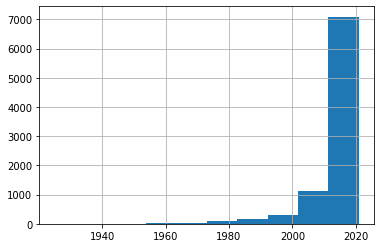

In [95]:
master_data['release_year'].hist() # Matplotlib Version

In [96]:
px.histogram(master_data, x='release_year')

In [97]:
master_data[master_data['release_year'] == 1925]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,2018-12-30,1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...


<AxesSubplot:>

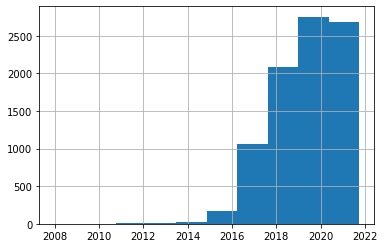

In [98]:
master_data['date_added'].hist()

In [99]:
px.histogram(master_data, x='date_added') #plotly method

### create new column called month_added

In [100]:
master_data.insert(loc=7, column='month_added', value= pd.DatetimeIndex(master_data['date_added']).month)

### For simplicity we will drop NA rows for both date_added and month_added

In [106]:
master_data = master_data[master_data['date_added'].notnull()]

In [107]:
master_data.isna().sum()

show_id            0
type               0
title              0
director        2624
cast             825
country          830
date_added         0
month_added        0
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [108]:
px.histogram(master_data, x='date_added', color='month_added') #plotly method

In [109]:
master_data.isna().sum()

show_id            0
type               0
title              0
director        2624
cast             825
country          830
date_added         0
month_added        0
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<AxesSubplot:>

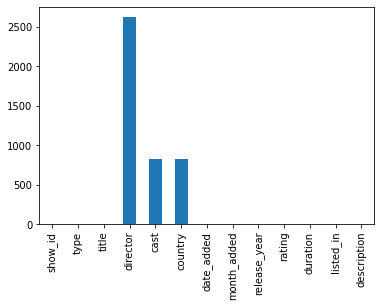

In [110]:
master_data.isna().sum().plot(kind='bar')

### See if there is a trend for what day of the month Netlfix adds shows/movies

In [112]:
master_data.insert(loc=7, column='day_added', value= pd.DatetimeIndex(master_data['date_added']).day)

In [113]:
master_data.head()

,show_id,type,title,director,cast,country,date_added,day_added,month_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,25,9.0,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,24,9.0,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,24,9.0,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,24,9.0,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,24,9.0,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [118]:
px.histogram(master_data, x='day_added', color='type')

## String Column Analysis

In [115]:
master_data.type.unique()

array(['Movie', 'TV Show'], dtype=object)

### Country with most contributions to Netflix catalog 

In [121]:
px.histogram(master_data, x='country')

In [122]:
master_data.country.unique()

array(['United States', 'South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kin

In [123]:
master_data['country'].str.split(',', expand=True)

,0,1,2,3,4,5,6,7,8,9,10,11
0,United States,None,None,None,None,None,None,None,None,None,None,None
1,South Africa,None,None,None,None,None,None,None,None,None,None,None
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,India,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,United States,None,None,None,None,None,None,None,None,None,None,None
8803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8804,United States,None,None,None,None,None,None,None,None,None,None,None
8805,United States,None,None,None,None,None,None,None,None,None,None,None


In [146]:
country_count = master_data.copy()
country_count = pd.concat([country_count, master_data['country'].str.split(',', expand=True)], axis=1)
country_count = country_count.melt(id_vars=['type','title'], value_vars=range(12), value_name='Country')
country_count = country_count[country_count['Country'].notna()]
country_count['Country'] = country_count['Country'].str.strip()
country_count

,type,title,variable,Country
0,Movie,Dick Johnson Is Dead,0,United States
1,TV Show,Blood & Water,0,South Africa
4,TV Show,Kota Factory,0,India
7,Movie,Sankofa,0,United States
8,TV Show,The Great British Baking Show,0,United Kingdom
...,...,...,...,...
78769,Movie,The Look of Silence,8,Germany
85404,Movie,Barbecue,9,Sweden
87566,Movie,The Look of Silence,9,Netherlands
94201,Movie,Barbecue,10,United States


In [150]:
px.histogram(country_count, x='Country', color='type').update_xaxes(categoryorder = 'total descending')

### Rating analysis

In [151]:
master_data.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [152]:
px.histogram(master_data, 'rating').update_xaxes(categoryorder='total descending')

### cast analysis

In [157]:
master_data['cast count'] = master_data['cast'].str.split(',')
master_data = master_data[master_data['cast count'].notna()]
master_data['cast count'] = master_data['cast count'].apply(lambda x: len(x))

In [158]:
master_data.head()

,show_id,type,title,director,cast,country,date_added,day_added,month_added,release_year,rating,duration,listed_in,description,cast count
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,24,9.0,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",19
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,24,9.0,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,24,9.0,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,8
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,24,9.0,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,16
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,24,9.0,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,10


In [161]:
px.histogram(master_data, x='cast count').update_xaxes(categoryorder='total descending')